# Proizvodnja iz TE i HE  - satni podaci

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
file_2019=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2019.csv")
file_2020=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2020.csv")
file_2021=pd.read_csv(r"FILES\ELEKT\Actual Generation per Production Type_2021.csv")

In [19]:
file_2019.head(3)

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,Bosnia and Herz. (BA),01.01.2019 00:00 - 01.01.2019 01:00 (CET),NaN,0.0,NaN,NaN,568.0,NaN,NaN,NaN,...,NaN,252.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0
1,Bosnia and Herz. (BA),01.01.2019 01:00 - 01.01.2019 02:00 (CET),NaN,0.0,NaN,NaN,547.0,NaN,NaN,NaN,...,NaN,183.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0
2,Bosnia and Herz. (BA),01.01.2019 02:00 - 01.01.2019 03:00 (CET),NaN,0.0,NaN,NaN,533.0,NaN,NaN,NaN,...,NaN,161.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,53.0


Text(0.5, 1.0, 'Proizvodnja 2021.')

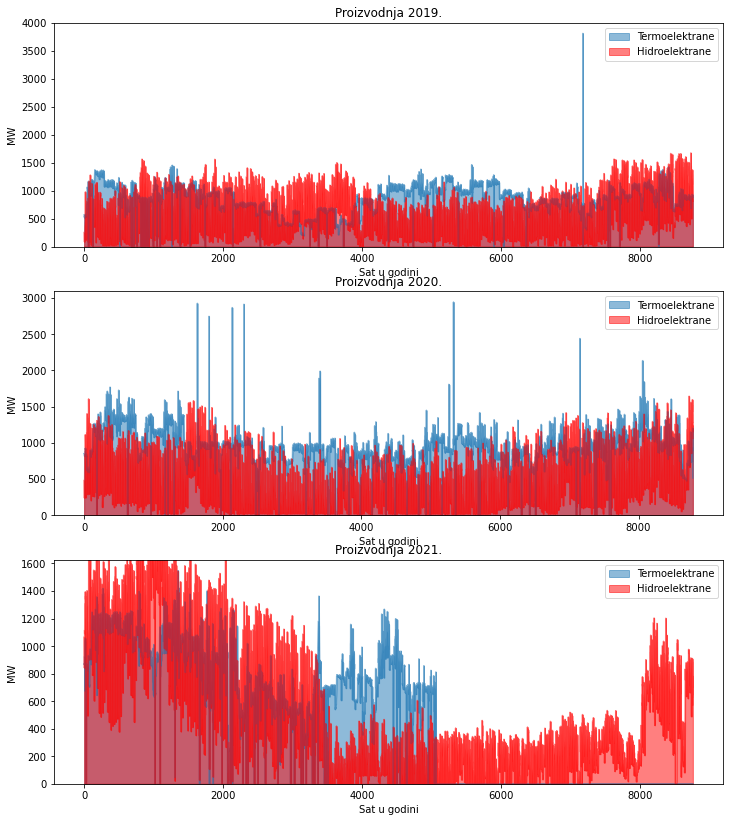

In [20]:
fig,ax=plt.subplots(nrows=3,figsize=(12,14))
file_2019['Fossil Hard coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[0])
file_2019["Hydro Water Reservoir  - Actual Aggregated [MW]"].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[0])
ax[0].legend()
ax[0].set_xlabel("Sat u godini")
ax[0].set_ylabel("MW")
ax[0].set_title("Proizvodnja 2019.")

file_2020['Fossil Hard coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[1])
file_2020["Hydro Water Reservoir  - Actual Aggregated [MW]"].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[1])
ax[1].legend()
ax[1].set_xlabel("Sat u godini")
ax[1].set_ylabel("MW")
ax[1].set_title("Proizvodnja 2020.")

file_2021['Fossil Hard coal  - Actual Aggregated [MW]'].plot(kind="area",stacked=False,label="Termoelektrane",ax=ax[2])
file_2021["Hydro Water Reservoir  - Actual Aggregated [MW]"].plot(kind="area",stacked=False,color="red",label="Hidroelektrane",ax=ax[2])
ax[2].legend()
ax[2].set_xlabel("Sat u godini")
ax[2].set_ylabel("MW")
ax[2].set_title("Proizvodnja 2021.")

In [22]:
file_2019[file_2019['Fossil Hard coal  - Actual Aggregated [MW]']>2000]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
7177,Bosnia and Herz. (BA),27.10.2019 01:00 - 27.10.2019 02:00 (CET),NaN,1362.0,NaN,NaN,3812.0,NaN,NaN,NaN,...,NaN,135.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,0.0


In [23]:
file_2020[file_2020['Fossil Hard coal  - Actual Aggregated [MW]']>2000]

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
1634,Bosnia and Herz. (BA),09.03.2020 02:00 - 09.03.2020 03:00 (CET),NaN,812.0,NaN,NaN,2926.0,NaN,NaN,NaN,...,NaN,1282.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,40.0
1802,Bosnia and Herz. (BA),16.03.2020 02:00 - 16.03.2020 03:00 (CET),NaN,818.0,NaN,NaN,2746.0,NaN,NaN,NaN,...,NaN,451.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,12.0
2138,Bosnia and Herz. (BA),30.03.2020 02:00 - 30.03.2020 03:00 (CET),NaN,817.0,NaN,NaN,2867.0,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,24.0
2306,Bosnia and Herz. (BA),06.04.2020 02:00 - 06.04.2020 03:00 (CET),NaN,812.0,NaN,NaN,2913.0,NaN,NaN,NaN,...,NaN,49.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,120.0
5330,Bosnia and Herz. (BA),10.08.2020 02:00 - 10.08.2020 03:00 (CET),NaN,804.0,NaN,NaN,2944.0,NaN,NaN,NaN,...,NaN,63.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,30.0
7153,Bosnia and Herz. (BA),25.10.2020 01:00 - 25.10.2020 02:00 (CET),NaN,0.0,NaN,NaN,2440.0,NaN,NaN,NaN,...,NaN,286.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,0.0
8059,Bosnia and Herz. (BA),01.12.2020 18:00 - 01.12.2020 19:00 (CET),NaN,276.0,NaN,NaN,2135.0,NaN,NaN,NaN,...,NaN,1015.0,NaN,NaN,NaN,NaN,n/e,NaN,n/e,16.0


In [24]:
names=['Fossil Hard coal  - Actual Aggregated [MW]',"Hydro Water Reservoir  - Actual Aggregated [MW]"]
print("Maksimum proizvodnje iz TE - 2019. ",file_2019[names[0]].max(axis=0),"MW")
print("Maksimum proizvodnje iz TE - 2020. ",file_2020[names[0]].max(axis=0),"MW")
print("Maksimum proizvodnje iz TE - 2021. ",file_2021[names[0]].max(axis=0),"MW")

print("Maksimum proizvodnje iz HE - 2019. ",file_2019[names[1]].max(axis=0),"MW")
print("Maksimum proizvodnje iz HE - 2020. ",file_2020[names[1]].max(axis=0),"MW")
print("Maksimum proizvodnje iz HE - 2021. ",file_2021[names[1]].max(axis=0),"MW")



Maksimum proizvodnje iz TE - 2019.  3812.0 MW
Maksimum proizvodnje iz TE - 2020.  2944.0 MW
Maksimum proizvodnje iz TE - 2021.  1548.0 MW
Maksimum proizvodnje iz HE - 2019.  1675.0 MW
Maksimum proizvodnje iz HE - 2020.  1643.0 MW
Maksimum proizvodnje iz HE - 2021.  2137.0 MW


In [25]:
file_2019=file_2019.assign(Timestamp=pd.date_range("2019-01-01 00:00:00","2020-01-01", freq="1H"))
file_2020=file_2020.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2021-01-01", freq="1H"))
file_2021=file_2021.assign(Timestamp=pd.date_range("2021-01-01 00:00:00","2022-01-01", freq="1H"))

In [26]:
#file=file.set_index(file['Timestamp'].astype('datetime64[ns]'))
file_2019["Month"],file_2020["Month"],file_2021["Month"]=file_2019["Timestamp"].dt.month,file_2020["Timestamp"].dt.month,file_2021["Timestamp"].dt.month
file_2019["Year"],file_2020["Year"],file_2021["Year"]=file_2019["Timestamp"].dt.year,file_2020["Timestamp"].dt.year,file_2021["Timestamp"].dt.year

In [27]:
file_total=pd.concat([file_2019[["Year","Month",names[0],names[1]]],file_2020[["Year","Month",names[0],names[1]]],file_2021[["Year","Month",names[0],names[1]]]],axis=0)

In [28]:
file_total

,Year,Month,Fossil Hard coal - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW]
0,2019,1,568.0,252.0
1,2019,1,547.0,183.0
2,2019,1,533.0,161.0
3,2019,1,538.0,112.0
4,2019,1,536.0,87.0
...,...,...,...,...
8756,2021,12,NaN,882.0
8757,2021,12,NaN,701.0
8758,2021,12,NaN,781.0
8759,2021,12,NaN,770.0


<AxesSubplot:xlabel='Year'>

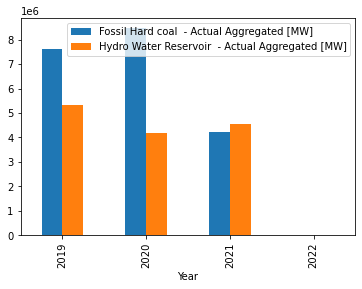

In [29]:
file_total.groupby("Year")[['Fossil Hard coal  - Actual Aggregated [MW]',"Hydro Water Reservoir  - Actual Aggregated [MW]"]].sum().plot(kind="bar")


Text(0.5, 1.0, 'Mjesečna proizvodnja')

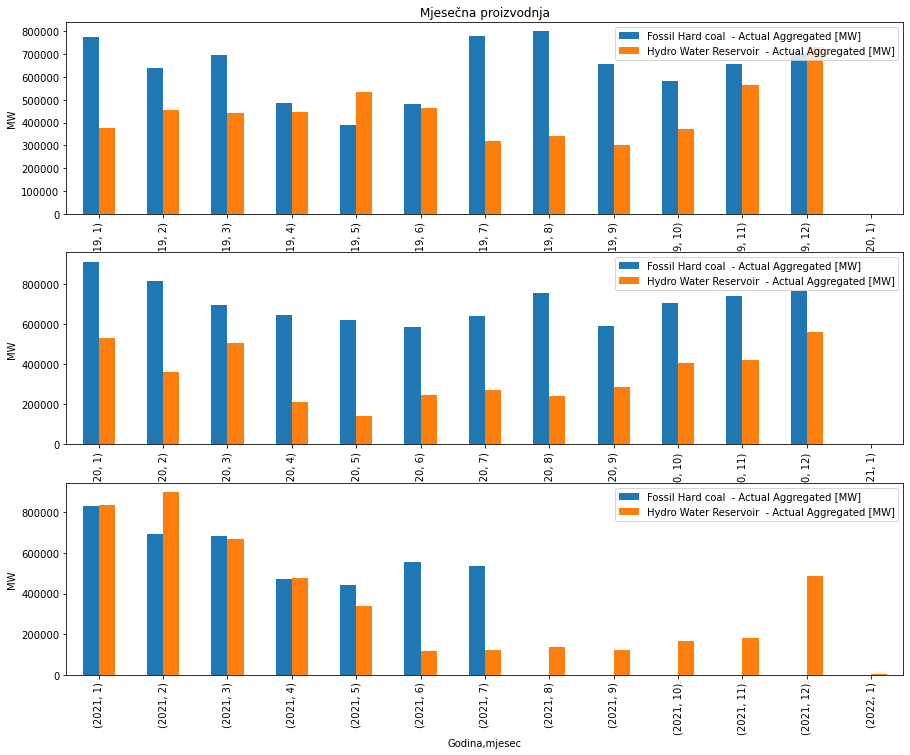

In [30]:
fig,ax=plt.subplots(nrows=3)
file_2019.groupby(["Year","Month"])[['Fossil Hard coal  - Actual Aggregated [MW]',"Hydro Water Reservoir  - Actual Aggregated [MW]"]].sum().plot(kind="bar",figsize=(15,12),ax=ax[0])
file_2020.groupby(["Year","Month"])[['Fossil Hard coal  - Actual Aggregated [MW]',"Hydro Water Reservoir  - Actual Aggregated [MW]"]].sum().plot(kind="bar",figsize=(15,12),ax=ax[1])
file_2021.groupby(["Year","Month"])[['Fossil Hard coal  - Actual Aggregated [MW]',"Hydro Water Reservoir  - Actual Aggregated [MW]"]].sum().plot(kind="bar",figsize=(15,12),ax=ax[2])
for k in range(len(ax)):
    ax[k].set_xlabel("Godina,mjesec")
    ax[k].set_ylabel("MW")
ax[0].set_title("Mjesečna proizvodnja")

In [31]:
len(file_2019[file_2019["Hydro Water Reservoir  - Actual Aggregated [MW]"]>file_2019['Fossil Hard coal  - Actual Aggregated [MW]']]["Month"])

2462

In [32]:
len(file_2020[file_2020["Hydro Water Reservoir  - Actual Aggregated [MW]"]>file_2020['Fossil Hard coal  - Actual Aggregated [MW]']]["Month"])

824

In [33]:
len(file_2021[file_2021["Hydro Water Reservoir  - Actual Aggregated [MW]"]>file_2021['Fossil Hard coal  - Actual Aggregated [MW]']]["Month"])

1989